<a href="https://colab.research.google.com/github/matheusgsaraiva/Fraud_Detection_Credit_Card/blob/main/PROJETO_MOD4_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

:# Credit Card Fraud Detection

In this project, we will address the problem of credit card fraud, a major concern for financial institutions such as banks and *fintechs*. In Brazil alone, about 12.1 million people have been victims of some kind of financial fraud in the last year. Translated into figures, financial scams have exceeded the figure of R$ 1.8 billion in losses per year for the last 12 months.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Among these frauds, those involving credit cards are of great relevance since their non-detection will lead to considerable losses, both for the consumer and the financial institution.

Another factor to be considered is the amount of false positives, i.e. those times when you tried to make a purchase and had your card preventively blocked - which probably generated stress and embarrassment.

For all these reasons, investment in the area of fraud detection through Artificial Intelligence is growing every year, representing a great opportunity in *Data Science*. 

With large volumes of data as a historical basis, a machine learning algorithm just a little better than the previous ones already represents savings of millions of dollars. And this is the challenge, to increasingly improve the use of algorithms to inhibit or prevent fraudulent transactions.

## Importing Data

The data we will use in this project was made available by some European credit card companies. The *dataset* represents the financial transactions that took place over a two-day period, where 492 frauds were classified out of almost 290,000 transactions.

As you can see, this is an extremely unbalanced data set, where frauds represent only 0.17% of the total.

Another interesting detail is that the *features* are all numeric, and have been de-characterized (for privacy and security reasons). Thus, the column names are represented by $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[In the source](https://www.kaggle.com/mlg-ulb/creditcardfraud), it is also reported that the variables have undergone a transformation known as Principal Component Analysis* (PCA).

PCA allows for dimensionality reduction while maintaining as much information as possible. To achieve this, the algorithm finds a new set of features - so called **components**.

These components are fewer in number or equal to the original variables. In the case of this project, the components found by the PCA transformation are the columns themselves $[V1, V2, V3 \dots, V28]$.

In [1]:
# installing library
pip install -U imbalanced-learn -q

SyntaxError: ignored

In [2]:
# installing library scikit-plot
!pip install scikit-plot -q

In [3]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# importing scikit-learn to create the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

import scikitplot as skplt
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [4]:
# importing RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

To make it easier to acquire the data, I have created a *link* with direct access to `csv`. With this, you can simply import the dataset using the `pd.read_csv()` method.

In [5]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# Importing data to a dataframe
df = pd.read_csv(file_path)

# Showing the shape of the dataset
print("Dimensões do Conjunto Original: ", df.shape)

# Creating test sample
test = df.sample(frac=0.15, random_state=0)

# Removing test lines
df = df.drop(test.index)

# Checking dataset
print("Shape of test dataset: ", test.shape)
print("Shape of training dataset: ", df.shape)

Dimensões do Conjunto Original:  (284807, 31)
Shape of test dataset:  (42721, 31)
Shape of training dataset:  (242086, 31)


With the data imported into a Dataframe structure-and with no further tuning or configuration needed at this stage-you can begin an exploratory analysis of the data in order to prepare a Machine Learning model.

It is important to split the sets, to avoid data leakage.

That done, let's get to the Exploratory Analysis.

## Exploratory Analysis

In the exploratory analysis, I will address the following topics/information below:

* View the first 5 entries
* View the summary statistics of the dataframe
* Check for missing values
* Plot a bar chart (or countplot) to see the balancing of the *dataset*
* Plot the following histograms:
    * `Time` variable
        * Fraud (`Class == 1`)
        * Normal (`Class == 0`)
    * Variable `Amount` * Fraud (`Class == 1`)
        * Fraud (`Class == 1`)
        * Normal (`Class == 0`)
* Plot a boxplot for the variable `Amount` when fraud was involved (`Class == 1`)
* Plot a correlation matrix

In [6]:
# Showing 5 first entries
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Checking number of lines
print("O dataset apresenta {:,}".format(df.shape[0]).replace(",","."), " linhas e {} colunas.".format(df.shape[1]))

O dataset apresenta 242.086  linhas e 31 colunas.


In [8]:
# Showing statistical summary of the 16 first variables
df.loc[:,"Time":"V15"].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,0.000813,-0.001191,-0.000572,0.000072,0.000397,0.000245
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,1.089895,1.020427,0.998089,0.996738,0.957170,0.915073
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,-0.534916,-0.764086,-0.406465,-0.649972,-0.425694,-0.583536
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,-0.092078,-0.034728,0.138776,-0.013510,0.050826,0.048587
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,0.456105,0.738961,0.617590,0.663700,0.493601,0.649324
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654


In [9]:
# Showing statistical summary of the 15 last variables
df.loc[:,"V16":"Class"].describe()

,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,0.000511,0.000385,-0.000521,0.000345,0.001813,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,0.875791,0.849826,0.837399,0.814400,0.763759,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,-14.129855,-25.162799,-9.498746,-7.213527,-25.222345,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,-0.467684,-0.484121,-0.499053,-0.456331,-0.211369,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,0.067503,-0.065976,-0.004100,0.003691,-0.062290,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,0.523874,0.399821,0.500078,0.459794,0.133355,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,7.059132,9.207059,5.041069,5.572113,39.420904,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


From the following code, we can see that the data set has no problems with missing values since all 31 columns have filled values.

In [10]:
# Checking null values
( ( df.isnull().sum() / df.shape[0] ) * 100 )

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

As we can see, the data set is considerably unbalanced, as frauds account for less than 1% of the total.

In [11]:
# Check the class balancing
print(df.Class.value_counts())
print("\nFrauds represent {:.4f}% of the dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

0    241668
1       418
Name: Class, dtype: int64

Frauds represent 0.1727% of the dataset.



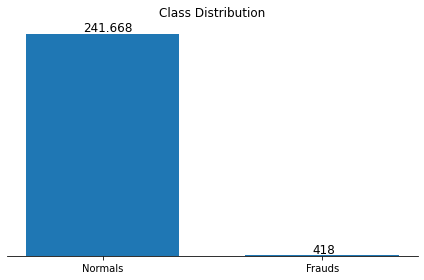

In [12]:
# Plot the number of normal and fraudulent transactions on a bar chart
fig, ax = plt.subplots(figsize=(6,4))

classes = ['Normals', 'Frauds']
operacoes = [df.Class.value_counts()[0], df.Class.value_counts()[1]]
ax.bar(classes, operacoes, width=0.7)

# Placing Values on the Graph
for i, j in enumerate(operacoes):
    valor = '{:,.0f}'. format(j).replace(',','.')
    if i == 0:
      ax.annotate(
        valor,
        xy=(i, j),
        xytext=(-20,2),
        textcoords='offset points',
        fontsize=12,
        #fontweight='medium'
      )
    else:
      ax.annotate(
        valor,
        xy=(i, j),
        xytext=(-10,2),
        textcoords='offset points',
        fontsize=12,
        #fontweight='medium'
      )
    
# Setting title
ax.set_title('Class Distribution')    

# remover spines da direita e superior
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# remover yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

plt.tight_layout()

Two graphs were also plotted in order to compare the distributions of the 2 classes along the (`Time`) dimension. However, no conclusions can be drawn from this graph, because the data distribution shows no pattern (several peaks) and is far from a normal distribution.

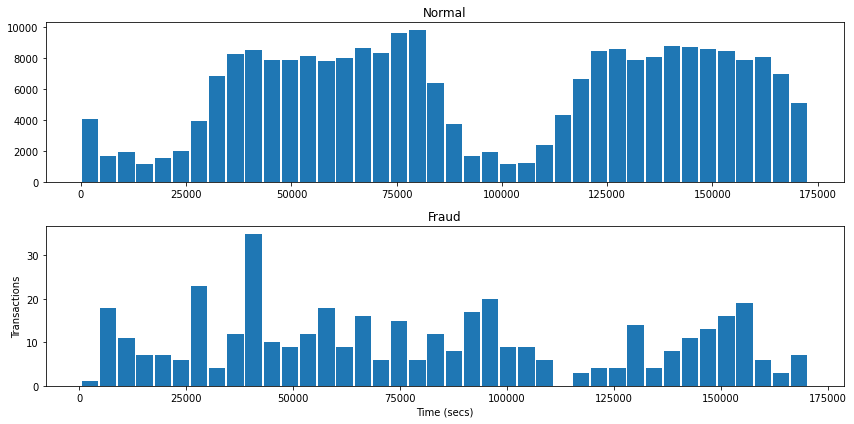

In [13]:
# Plot the histogram of operations by time
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins = num_bins, rwidth = 0.9)
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins = num_bins, rwidth = 0.9)
ax[1].set_title('Fraud')

plt.xlabel('Time (secs)')
plt.ylabel('Transactions')

plt.tight_layout()

We also plotted two graphs in order to compare the distributions of the 2 classes along the quantity (`Amount`) dimension. From this histogram, it can be concluded that for fraudulent transactions, they are generally made to extract amounts of less than $500.

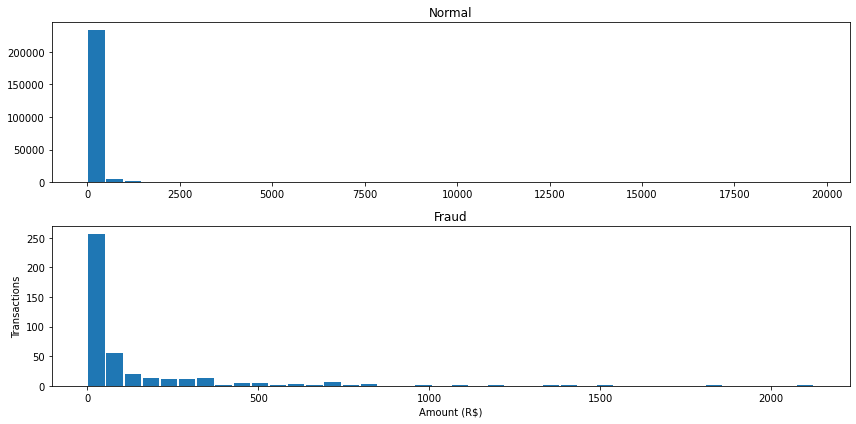

In [14]:
# Plot the histogram of operations by quantity
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 40

ax[0].hist(df.Amount[df.Class == 0], bins = num_bins, rwidth = 0.9)
ax[0].set_title('Normal')

ax[1].hist(df.Amount[df.Class == 1], bins = num_bins, rwidth = 0.9)
ax[1].set_title('Fraud')

plt.xlabel('Amount (R$)')
plt.ylabel('Transactions')

plt.tight_layout()

[-250, 0, 100, 200, 300, 400, 500, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250]


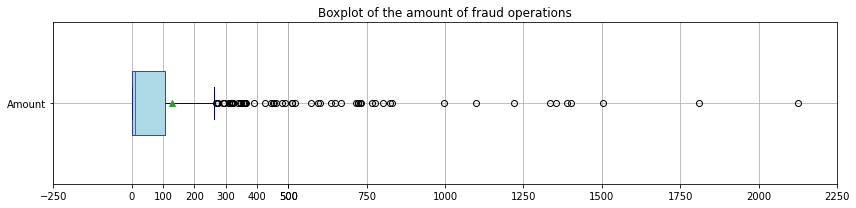

In [15]:
# Plot a boxplot for the variable Amount when there was fraud (Class == 1)
fig, ax = plt.subplots(figsize=(12,3))

df[df.Class == 1].boxplot('Amount', vert = False, ax = ax, patch_artist = True,
                          widths = 0.4,
                          showmeans = True,
                          medianprops={"color": "red", "linewidth": 0.8},
                          boxprops={"facecolor": "lightblue", "edgecolor": "darkblue", "linewidth": 0.7,},
                          whiskerprops={"color": "darkblue", "linewidth": 1.0},
                          capprops={"color": "darkblue", "linewidth": 1.0}
                          )
# Setting title
ax.set_title("Boxplot of the amount of fraud operations")

# Format y axis
a=0
intervalo = [-250]
while a < 2251:
  if a <= 500:
    intervalo.append(a)
    a += 100
  elif a > 500:
    if a == 600:
      a = 500
    intervalo.append(a)
    a += 250
ax.set_xticks(intervalo)

#intervalo = [-250,0,range(0,501,50),range(500,2251,250)]

plt.tight_layout()

print(intervalo)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


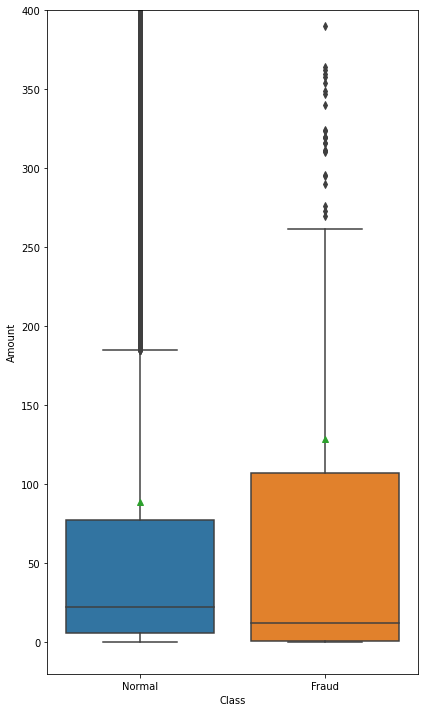

In [16]:
# Plot a boxplot of the quantity for when there was and was not fraud
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraud'])

plt.tight_layout()

## Data Treatment

* Normalize the data that had not been preprocessed (`Time` and `Amount`)
* Split the data set between training and validation
* [*Recommended*] Balance the data set

**Standardize `Time` and `Amount` **

For this step, since the `Amount` column has *outliers* we will use standardization through the `StandardScaler` class.

In [17]:
# Standardize the Time and Amount columns
df_clean = df.copy()

std_scaler = StandardScaler()

df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

df_clean.drop(['Time', 'Amount'], axis = 1, inplace = True)

# Show 5 first entries
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


**Split between Training and Validation sets**.

Before proceeding with data balancing, we must split the existing data between Training and Validation sets. Otherwise, we will have no parameters to check if the balancing has been adequate.

To ensure that the Training and Validation sets have the same number of classes proportionally, we pass `stratify=True`.

In [18]:
# Separate the data between feature matrix and target vector 
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# Split the dataset between training and testing
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

**Data Balancing**

Using the `imblearn` library you can easily apply data balancing techniques. In this case, the choice in this project was to use *Under-sampling*, preserving the minority class.

It is easy to see that there is no longer that initial discrepancy (bar graph at the beginning of this *notebook*).

0    313
1    313
Name: Class, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


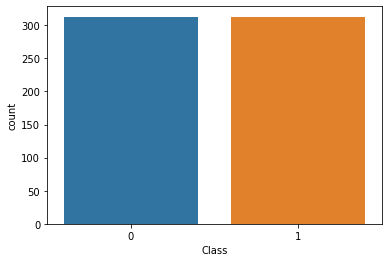

In [19]:
# Using under-sampling technique
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Show class balancing
print(pd.Series(y_rus).value_counts())

# Plotting new class distribution
sns.countplot(y_rus);

With the data balanced, we can look at the correlation matrix and identify which variables are most strongly related to the others.

Notice how previously, without balancing the data, the correlation matrix did not provide any relevant information. However, it provides much more information after proper balancing.

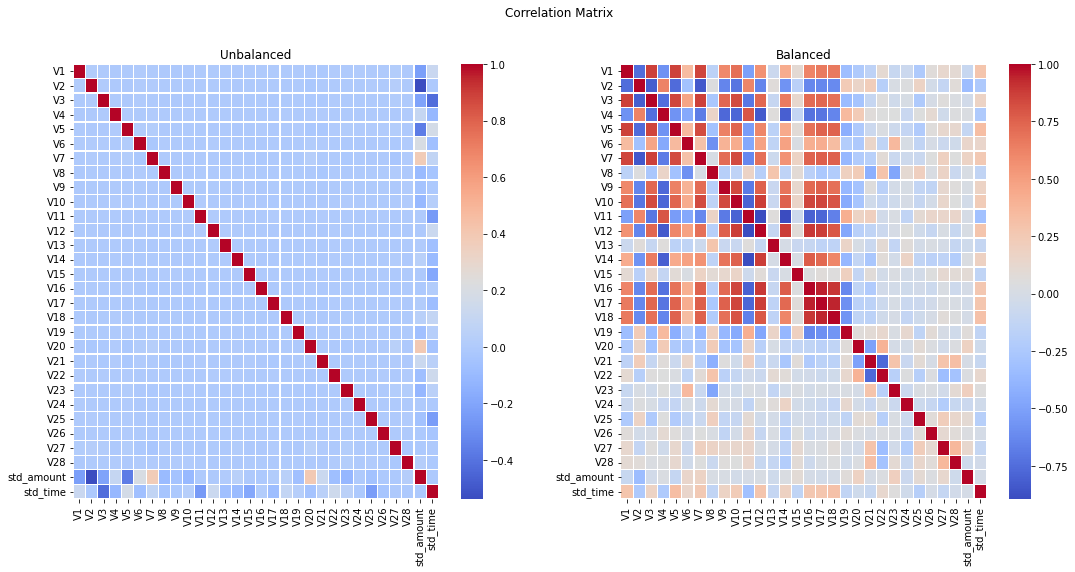

In [20]:
# Plotting correlation matrix
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Correlation Matrix')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Unbalanced')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanced')

plt.show()

## Machine Learning Model

With all the data prepared and after a thorough exploratory analysis, I will build a classifier using Logistic Regression.

After instantiating the model, it will be trained on top of the `X_rus` and `y_rus` data, because they are balanced and this helps the model to get better results. Next, predictions will be made on the test data.

In [21]:
# Instantiating and training a Logistic Regression model
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# Making predictions on top of the test data
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

With the model trained and the predictions made, the next step is to evaluate its performance.

In this type of problem, originally unbalanced, accuracy is not an adequate metric. As explained [in this Sigmoidal article](http://sigmoidal.ai/como-lidar-com-dados-desbalanceados/), it is possible to have an accuracy of 99.88% and detect less than 60% of the frauds.

Look at the confusion matrix to see the hit rate for fraudulent transactions, or by the *recall* column of the Classification Report. 

Another metric that is considered interesting for evaluating effectiveness is the [AUC ROC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772), or area under the curve. In the case of this Logistic Regression model, it has 94% AUC.

Classification report:
               precision    recall  f1-score   support

           0     0.9998    0.9594    0.9792     60417
           1     0.0362    0.8762    0.0695       105

    accuracy                         0.9593     60522
   macro avg     0.5180    0.9178    0.5243     60522
weighted avg     0.9981    0.9593    0.9776     60522

Accuracy: 0.9593

AUC: 0.9178



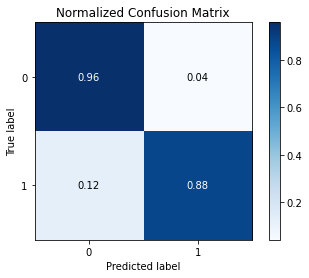

In [22]:
# Plotting correlation matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# Printing classification report
print("Classification report:\n", classification_report(y_val, y_pred, digits=4))

# Printing accuracy of the model
print("Accuracy: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# Printing area under the curve
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

## Predicting on the Test Set

At the beginning of the project, we performed a split on the data so that we had 3 sets: A training set, a validation set, and a test set. 

Now that we have explored and prepared the data, set up the model, and made predictions on the validation set, it is time to discover the potential of this simple model with the test data.

What we will do is just use the model we trained with a new set. But for the results to be fair, we need to make sure that the new data is in the same condition as that which our model expects.

In this case we need to standardize the columns Time and Amount. We cannot balance the data because there would be a loss. Our model needs to be treated but we need to make predictions on all the rows it receives.

In [23]:
# Standardizing Time and Amount columns - Test
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# Showing first 5 entries
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


Now we just have to separate between X and Y, and make our predictions.



In [24]:
# Separating variables between X and y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

In [25]:
# Making predictions on top of the test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

That's it! With our predictions done, it's time to visualize the results.



Classification report:
               precision    recall  f1-score   support

           0     0.9999    0.9590    0.9790     42647
           1     0.0380    0.9324    0.0729        74

    accuracy                         0.9589     42721
   macro avg     0.5189    0.9457    0.5260     42721
weighted avg     0.9982    0.9589    0.9774     42721

Accuracy: 0.9589

AUC: 0.9457



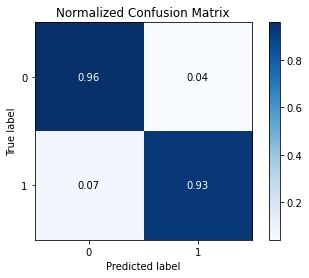

In [26]:
# Plotting classification report
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# Printing classification report
print("Classification report:\n", classification_report(y_test, y_pred, digits=4))

# Printing accuracy of the model
print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# Printing area under the curve
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

We can see that our results were better than during validation, as the accuracy remained around 96% but the AUC increased to 94.57%. Which is an excellent result!

## Conclusions

As you can see, this is not a trivial problem. Although the data is well treated and clean, with no missing values or categorical variables, the unbalancing and the PCA Transformation demanded a considerable amount of work.

Obviously, despite the good final result, there is room to test the performance with other classification algorithms, and to optimize their parameters.